## Prepare a model for glass classification using KNN

## 1.Import the necessary Libraries

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

## 2.Import the Data

In [2]:
glass_data = pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## 3.Data Understanding

In [3]:
glass_data.shape

(214, 10)

In [4]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## 4.Normalize the Data

In [41]:
scalar = StandardScaler()

In [8]:
new_df = glass_data.drop(labels='Type',axis=1)
new_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [10]:
scaled_data = scalar.fit_transform(new_df)
scaled_data

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [13]:
scaled_df = pd.DataFrame(scaled_data,columns=new_df.columns)
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


## 5.Divide the training and testing data

In [17]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df,glass_data['Type'],test_size=0.3)

In [18]:
X_train.shape,y_train.shape

((149, 9), (149,))

In [19]:
X_test.shape,y_test.shape

((65, 9), (65,))

## 6.Using KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(X_test)
pred

array([1, 1, 5, 2, 3, 2, 5, 1, 2, 1, 2, 1, 1, 6, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 3, 2, 2, 1, 7, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 6, 1, 1,
       2, 3, 1, 1, 2, 7, 7, 3, 1, 3, 2, 7, 1, 2, 1, 3, 3, 6, 2, 1, 2],
      dtype=int64)

## 7.Predictions and Evaluations
Let's evaluate our KNN model!

In [26]:
print(confusion_matrix(y_test,pred))

[[20  6  4  0  0  0]
 [ 4 13  2  0  0  0]
 [ 2  2  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  1  0  0  3  0]
 [ 0  0  0  0  0  4]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.77      0.67      0.71        30
           2       0.57      0.68      0.62        19
           3       0.14      0.20      0.17         5
           5       1.00      0.67      0.80         3
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         4

    accuracy                           0.66        65
   macro avg       0.75      0.66      0.69        65
weighted avg       0.70      0.66      0.67        65



## Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaled_df,glass_data['Type'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Error Rate')

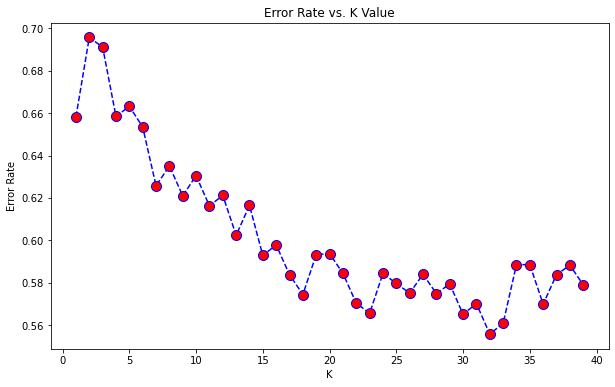

In [32]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[24  6  0  0  0  0]
 [ 2 16  0  0  1  0]
 [ 2  3  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 2  1  0  1  0  0]
 [ 0  0  0  0  0  4]]


              precision    recall  f1-score   support

           1       0.80      0.80      0.80        30
           2       0.59      0.84      0.70        19
           3       0.00      0.00      0.00         5
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         4
           7       1.00      1.00      1.00         4

    accuracy                           0.71        65
   macro avg       0.51      0.55      0.53        65
weighted avg       0.63      0.71      0.66        65

